<a href="https://colab.research.google.com/github/Megha-TK/GenAI_Project/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [ ]:
data = pd.read_csv('data_day5.csv')

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)

In [ ]:
data.shape


(569, 31)

In [ ]:
data.shape

(569, 31)

In [ ]:
data.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


<Axes: xlabel='diagnosis', ylabel='count'>

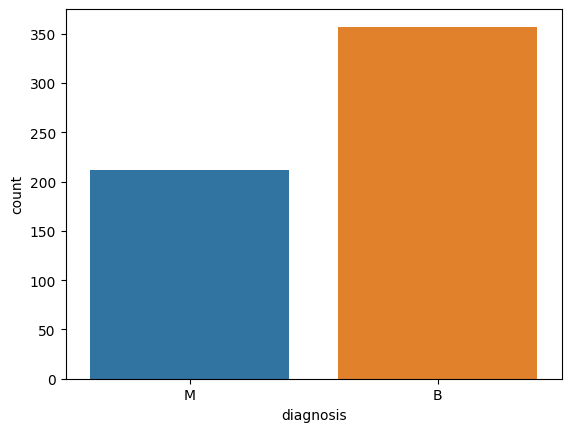

In [ ]:
sns.countplot(data=data, x='diagnosis',hue='diagnosis')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])

In [ ]:
x = data.drop('diagnosis',axis=1)
y = data.diagnosis.values

In [ ]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
y_test.shape

(114,)

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class TabularData(Dataset):
  def __init__(self , x,y):
    super().__init__()
    self.x = torch.from_numpy(x).type(torch.float32)
    self.y = torch.from_numpy(y).type(torch.float32)
  def __len__(self):
    return len(self.x)
  def __getitem__(self,id):
    return self.x[id], self.y[id]

In [ ]:
train_data = TabularData(x_train,y_train)


In [ ]:
len(train_data)

455

In [ ]:
train_loader= DataLoader(train_data,batch_size=8,shuffle=True)

In [ ]:
class BinClr(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.order = torch.nn.Sequential(
        torch.nn.Linear(in_faetures=30,out_features=32),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=32,out_features=16),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=16,out_features=1)
    )
    def forward(self,x : torch.Tensor):
      return self.order(x)

In [ ]:
class BinClr(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(in_features=30,out_features=32)
    self.layer2 = torch.nn.Linear(in_features=32,out_features=16)
    self.layer3 = torch.nn.Linear(in_features=16,out_features=1)
    self.relu = torch.nn.ReLU()
  def forward(self,x : torch.Tensor):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
device = 'cuba' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
model = BinClr().to(device)

In [ ]:
model

BinClr(
  (layer1): Linear(in_features=30, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-9.7686e-02,  8.8339e-02,  9.9686e-02, -1.0488e-01,  1.7980e-01,
                       -5.2404e-02, -1.3588e-01, -1.0847e-01,  2.3384e-02, -1.7351e-01,
                        1.4175e-01, -4.3166e-02,  4.5800e-02,  1.0380e-01,  5.4583e-03,
                       -7.5331e-02,  3.9942e-02,  1.2580e-01, -1.7938e-01,  9.0432e-02,
                       -1.6176e-01,  8.1894e-02, -5.9806e-02,  1.1491e-01,  3.5596e-02,
                        7.2863e-02,  3.0731e-02,  1.4900e-01,  1.1260e-01,  3.2963e-02],
                      [-4.8464e-02,  9.6249e-02, -4.5018e-02,  1.1335e-01, -4.9702e-02,
                        1.1270e-01, -1.6471e-01, -1.3395e-01, -6.1404e-02, -2.2384e-03,
                        6.7611e-02,  3.8452e-02, -4.0133e-03, -1.5710e-01, -1.8204e-01,
                       -6.6647e-02,  1.1389e-01, -1.0422e-01, -4.5488e-02, -1.8742e-02,
                       -7.2090e-02, -3.6976e-02,  5.8218e-02, -6.8519e-02, -5.6604e-02,


In [ ]:
(torch.sigmoid(model(next(iter(train_loader))[0].type(torch.float32)))>=0.5).type(torch.int)

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.int32)

In [ ]:
loss = torch.nn.BCELoss()#Binary cross entropy loss
optim = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [ ]:
epochs = 15

for epoch in range(epochs):
  temp_loss = []
  for i, (features, target) in enumerate(train_loader):
    model.train()

    y_pred = torch.sigmoid(model(features))

    loss_fn = loss(y_pred.squeeze(), target)

    temp_loss.append(loss_fn.item())

    optim.zero_grad()

    loss_fn.backward()

    optim.step()

  print(f"Epoch {epoch} | loss: {sum(temp_loss)/len(temp_loss)}")

Epoch 0 | loss: 0.5670574997600756
Epoch 1 | loss: 0.25011259578821954
Epoch 2 | loss: 0.11958689285899725
Epoch 3 | loss: 0.08454627736896407
Epoch 4 | loss: 0.07132549802445921
Epoch 5 | loss: 0.06361654669091334
Epoch 6 | loss: 0.0576773332779116
Epoch 7 | loss: 0.05304808678460846
Epoch 8 | loss: 0.05072844520276576
Epoch 9 | loss: 0.044909645791146126
Epoch 10 | loss: 0.04180132142235443
Epoch 11 | loss: 0.039208156385013765
Epoch 12 | loss: 0.03625340442573488
Epoch 13 | loss: 0.03344465378700478
Epoch 14 | loss: 0.03138654821464514


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
x_test.shape

(114, 30)

In [ ]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
y_pred = torch.sigmoid(model(torch.from_numpy(x_test).type(torch.float32))).detach().numpy()

In [ ]:
y_pred = (y_pred>=0.5).astype(int).squeeze()

In [ ]:
score = 100*(accuracy_score(y_test, y_pred))

In [ ]:
score

98.24561403508771

<Axes: >

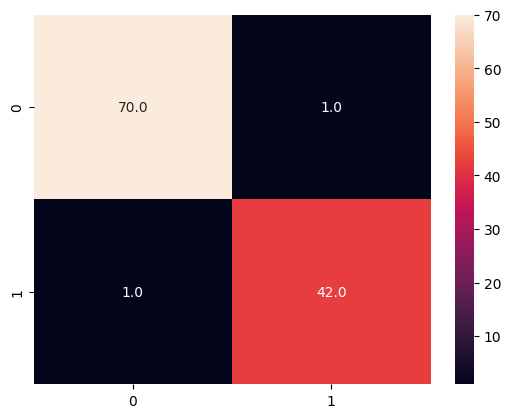

In [ ]:
!pip install scikit-learn
#Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.1f', annot=True)

In [ ]:
patient1 = x_train[1]

In [ ]:
result = (torch.sigmoid(model(torch.from_numpy(patient1).type(torch.float32)))>=0.5).type(torch.int)[0]

In [ ]:
if result == 0:
  print("It is Benign")
else:
  print("It is Malignant")

It is Malignant
